# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0382 Афанасьев Назар. Вариант №26

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними.

**Виды диад:**
- Взамная диада - $D_{ij}=(1, 1)$
- Асимметричная диада - $D_{ij}=(0, 1)$ или $D_{ij}=(1, 0)$
- Нулевая диада - $D_{ij}=(0, 0)$

**Цензус диад** - тройка чисел $(M, A, N)$, где
- $M = \sum_{i<j}X_{ij}X_{ji}$ - число взаимных диад
- $A = X_{++}-2M$ - число асимметричных диад
- $N = (_2^g)-A-M$ - число нулевых диад

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе к взаимному выбору друг друга. $(-\infty < \rho_{KP} \le 1)$

*Для фиксированного выбора из $d$ акторов*:

Оценка по методу моментов: $\hat{\rho}_{KP} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - 1 - d)}}$.

Вероятность того, что связь будет взаимной для двух акторов: $\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{KP} \frac{g - 1 - d}{g - 1} \right)}.$

*Для свободного выбора*:

Оценка по методу моментов: $\hat{\rho}_{KP} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$, где $L=\sum_i X_{i+}$, а $L_2=\sum_i X^2_{i+}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов): $P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}$.

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества взаимных диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$ 

где $M_{\min} = \max f(t), 0 \le t \le g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} X_{i+} - \max g(t)\rfloor, 0 \le t \le g,$

$f(t) = \sum^t_{i=1} X_{i+} - t(g - 1) - (^t_2),$

$g(t) = \sum^t_{i=1} X_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, X_{i+}).$

**Вычисление доверительного интервала для оценки параметра P**:

Оценка P: $\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \le P \le \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\Phi(z_{\alpha/2}) = 0.5 - \frac{\alpha}2$, где $\alpha - $ уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

№1. С помощью библиотеки igraph (конкретно функции erdos.renyi.game()) был смоделирован случайный орграф
$\mathcal{G}_d$ на основе модели Эрдеша—Реньи: $\mathcal{G}_d = \mathcal{G} (g, p)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами.

Модель описывается следующим образом: в графе $\mathcal{G} (g, p)$ имеется 𝑔 вершин, и для каждого ребра вероятность того, что оно присутствует в графе, равна 𝑝.

In [55]:
library(igraph)
g <- 65
p <- 0.62
p0 <- 0.69
alpha <- 0.05
graph <- erdos.renyi.game(g, p, directed = T)

№2. Полученный граф был отображён через функцию plot и алгоритма укладки Фрюхтермана–Рейнгольда. Так как вероятность появления ребра между вершинами достаточно велика, то граф получается очень запутанным.

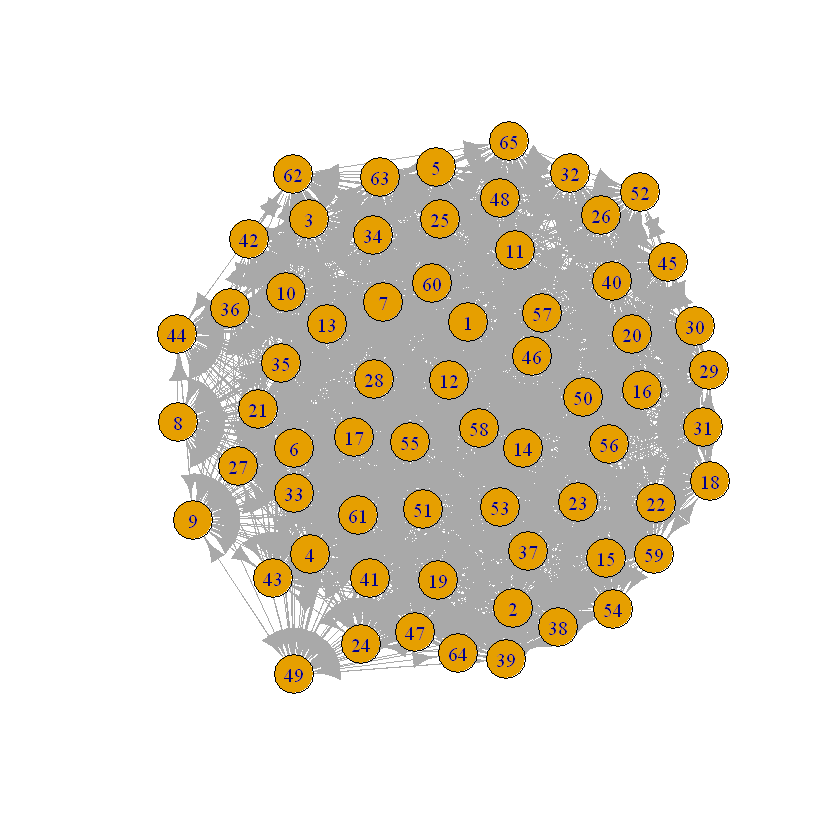

In [56]:
plot(graph, layout=layout_with_fr(graph))

№3. Была вычислена «пятичисловая сводка» графа. Размер сети равен количеству акторов ($g=65$). Для ориентированных сетей плотность равна $\varDelta = \frac{L}{A_g^2} = \frac{L}{A_{65}^{2}} = \frac{L}{4160}$ и это значение примерно будет равно $p$. Количество компонент связности, диаметр и коэффициент кластеризации вручную подсчитать не получиться. В виду большой вероятности появления ребра, однако, можно сказать, что вероятнее всего число компонент и диаметр будут малыми, а коэффициент кластеризации большим. 

In [57]:
cat("Размер: ", gorder(graph), "\n")
cat("Плотность: ", edge_density(graph), "\n")
cat("Число компонент: ", components(graph)$no, "\n")
cat("Диаметр: ", diameter(graph), "\n")
cat("Коэффициент кластеризации: ", transitivity(graph), "\n")

Размер:  65 
Плотность:  0.621875 
Число компонент:  1 
Диаметр:  2 
Коэффициент кластеризации:  0.8607346 


№4. Был определён цензус диад c помощью функции dyad_census.

**Вывод**: Почти половина диад (48%) оказалась асимметричной, чуть меньше (38%) в графе взаимных диад, значительно меньше нулевых диад (14%). Такой результат ожидаемый, ведь шанс появления двунаправленного ребра равен $p*p=0.3844$, однонаправленного - $2*p*(1-p)=0.4712$, а шанс отутствия ребра - $(1-p)^2=0.1444$.

In [60]:
census <- dyad_census(graph)
cat("Число взаимных диад: ", census$mut, "\n")
cat("Число асимметричных диад: ", census$asym, "\n")
cat("Число нулевых диад: ", census$null, "\n")

Число взаимных диад:  798 
Число асимметричных диад:  991 
Число нулевых диад:  291 


№5. Была вычислена оценка индекса взаимности Каца-Пауэла при фиксированном выборе акторов (взято $d=\frac{g-1}{2}=32$) и при свободном выборе.

**Вывод**: получаем, что при фиксированном выборе (d=32) акторы имеют положительную тенденцию (индекс 0.53) к образованию взаимных диад, а при свободном выборе не имеют такой тенденции, но и не имеют обратной тенденции, так как значение по модулю невелико (индекс -0.01).

In [81]:
M <- census$mut
d <- 32
ro_kp_fix <- (2*(g-1)*M-g*d^2)/(g*d*(g-1-d))

X <- as_adj(graph, sparse=F)
L <- sum(rowSums(X))
L2 <- sum(rowSums(X)^2)
ro_kp_free <- (2*(g-1)^2*M-L^2+L2)/(L*(g-1)^2-L^2+L2)

cat("Оценка при фиксированном выборе (d=32):", ro_kp_fix, "\n")
cat("Оценка при свободном выборе:", ro_kp_free, "\n")

Оценка при фиксированном выборе (d=32): 0.5346154 
Оценка при свободном выборе: -0.01284289 


№6. Была вычислена вероятноcть того, что связь будет взаимной для каждого случая. Так как при свободном выборе значения вероятности отличаются для каждого актора, выводились только минимальное, максимальное и среднее значение. 

In [91]:
p_fix <- (d/(g-1))*((d/(g-1))+ro_kp_fix*(g-1-d)/(g-1))
p_free <- (rowSums(adj_matrix)*colSums(adj_matrix))/(g - 1)^2

cat('Вероятность для фиксированного выбора', p_fix, '\n')
cat('Вероятность для свободного выбора: min=', min(p_free), ', max=', max(p_free), ', avg=', mean(p_free), '\n', sep='')

Вероятность для фиксированного выбора 0.3836538 
Вероятность для свободного выбора: min=0.2734375, max=0.5371094, avg=0.3871883


№7. Был вычислен индекс взаимности Бандиопадхьяйя.

**Вывод**: Индекс получился равным 0.624431, что примерно равно вероятности наличия связи между двумя акторами (p = 0.62).

In [137]:
row_sum <- rowSums(adj_matrix)

f_func <- function(t)
    sum(row_sum[1:t]) - t*(g-1) - t*(t-1)/2

g_func <- function(t)
    sum(row_sum[1:t]) - t*(t-1) - sum(pmin(t, row_sum[(t+1):g]))

g_res_ <- unlist(lapply(1:g, g_func))
f_res <- unlist(lapply(1:g, f_func))

M_max <- floor(0.5 * sum(row_sum[1:g]) - max(g_res))
M_min <- max(f_res)

B_index <- (M - M_min)/(M_max - M_min)
cat('индекс взаимности Бандиопадхьяйя:', B_index)

индекс взаимности Бандиопадхьяйя: 0.624431

№8. Была проверена гипотеза $H_0: L ∼ Bin(g(g − 1), 1/2)$ при уровне значимости $\alpha=0.05$.

**Вывод**: Максимальный уровень значимости при котором нулевая гипотеза не отвергается (p-value) очень мал (< 2.2e-16). Уровень значимости $\alpha=0.05$ выше p-value, значит гипотезу отвергаем. Этот результат ясен, ведь вероятность наличия ребра $\ne \frac12$, а приблизительно равна $p$ (в выводе функции даётся $p=0.621875$).

In [138]:
binom.test(sum(X), g*(g-1), p = 0.5)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 2587, number of trials = 4160, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6069377 0.6366410
sample estimates:
probability of success 
              0.621875 


№9. Была проверена гипотеза $H_0: L ∼ Bin(g(g − 1), P_0)$ при уровне значимости $\alpha=0.05$. 

**Вывод**: Максимальный уровень значимости при котором нулевая гипотеза не отвергается (p-value) очень мал (< 2.2e-16). Уровень значимости $\alpha=0.05$ выше p-value, значит гипотезу отвергаем. Этот результат ясен, ведь вероятность наличия ребра $\ne 0.69$, а приблизительно равна $p$ (в выводе функции даётся $p=0.621875$).

In [142]:
binom.test(sum(X), g*(g-1), p = 0.621875)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 2587, number of trials = 4160, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.621875
95 percent confidence interval:
 0.6069377 0.6366410
sample estimates:
probability of success 
              0.621875 


№10. Был построен доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью $(1 − \alpha) = 0.95$.

**Вывод**: Получился доверительный интервал $[0.607139 \le p \le 0.636611]$, то есть с вероятностью 95% p должен лежать в этом интервале. Это соответсвует и заданному в условию $p=0.62$, и полученному в binom.test $p=0.621875$, а также отвергнутым гипотезам с $p=0.5$ и $p=0.69$.

In [150]:
Ф_z_a2 <- 0.5 - alpha/2
z_a2 <- 1.96 # по таблице значений функции Лапласа
cat('Ф(', z_a ,') = ', Ф_z_a2, '\n', sep='')

p_est <- sum(X)/g/(g-1)
p_lower <- p_est - z_a2 * sqrt((p_est * (1 - p_est))/(g * (g - 1)))
p_upper <- p_est + z_a2 * sqrt((p_est * (1 - p_est))/(g * (g - 1)))
cat('Доверительный интервал: [', p_lower, ' <= p <= ', p_upper, ']', sep='')

Ф(1.96) = 0.475
Доверительный интервал: [0.607139 <= p <= 0.636611]

## Выводы

В результате выполнения практической работы были получены навыки работы с математическими пакетами для статистического анализа социальных сетей. Благодаря полученным знаниям можно определять тенденцию создания парных связей в диадах графа через вычисление цензуса диад и подсчёта с помощью него индексов взаимности Каца-Пауэла и Бандиопадхьяйя, а также определять вероятность появления рёбер и, соответсвенно, число рёбер через проверку гипотез о принадлежности числа рёбер в графе биномиальному распределению. Как и в остальной статистике матпакеты позволяют легче находить интересующие значения при больших входных данных, в данном случае при больших размерах графа и, соответсвенно, большом количестве рассматриваемых диад.